<a href="https://colab.research.google.com/github/ObiDaniel/ObiDaniel/blob/main/Twitter_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Information
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

 Label '1' means tweet is racist/sexist and label '0'means tweet is not racist/sexist,the objective is to predict the labels on the test dataset.

 Dataset download link: https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/

#Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset

In [ ]:
train_tweet_df = pd.read_csv('train.csv')
test_tweet_df =  pd.read_csv('test.csv')

In [ ]:
train_tweet_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
#Defining the FUNCTION used to remove @user patterns

import re
import nltk

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [ ]:
#Remove twitter handles (@user) cos it's unneccessary to the model training

train_tweet_df['cleaned_tweet'] = np.vectorize(remove_pattern)(train_tweet_df['tweet'], "@[\w]*")

In [ ]:
train_tweet_df

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


#Visualizing The Dataset AND Cleaning The Texts

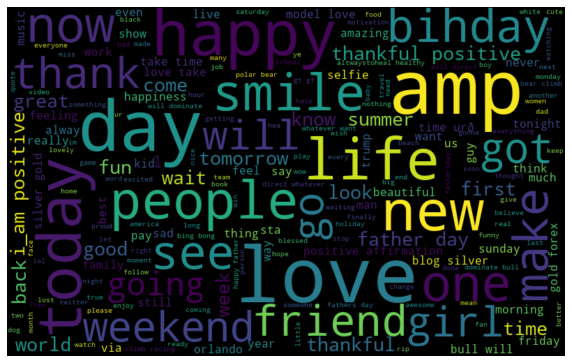

In [ ]:
#Let's visualise the most common/frequent words in the dataset

all_words = ' '.join([text for text in train_tweet_df['cleaned_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

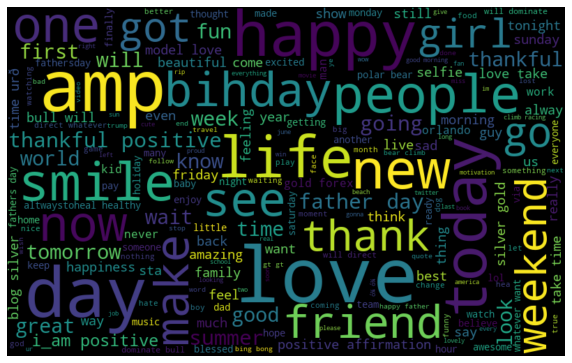

In [ ]:
#Visualize positive words

positive_words = ' '.join([text for text in train_tweet_df['cleaned_tweet'][train_tweet_df['label'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

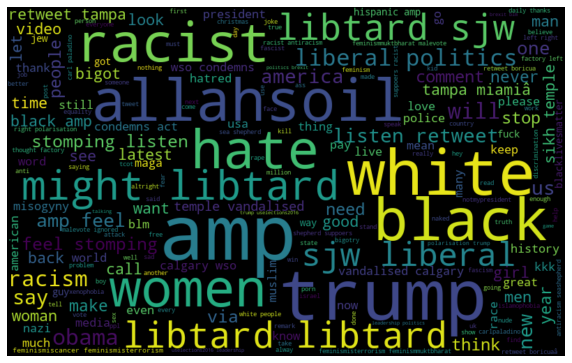

In [ ]:
#Visualize negative words

negative_words = ' '.join([text for text in train_tweet_df['cleaned_tweet'][train_tweet_df['label'] == 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Since hashtags denotes ongoing trends on Twitter, it's important we visualize it
#To make out most positive and negative hashtags


#Function to collect hashtags

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
#Extracting hashtags from positive tweets

ht_positive = hashtag_extract(train_tweet_df['cleaned_tweet'][train_tweet_df['label'] == 0])

#Extracting hashtags from negative tweets

ht_negative = hashtag_extract(train_tweet_df['cleaned_tweet'][train_tweet_df['label'] == 1])

#Un-nesting list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

#Visualise The Hashtags 

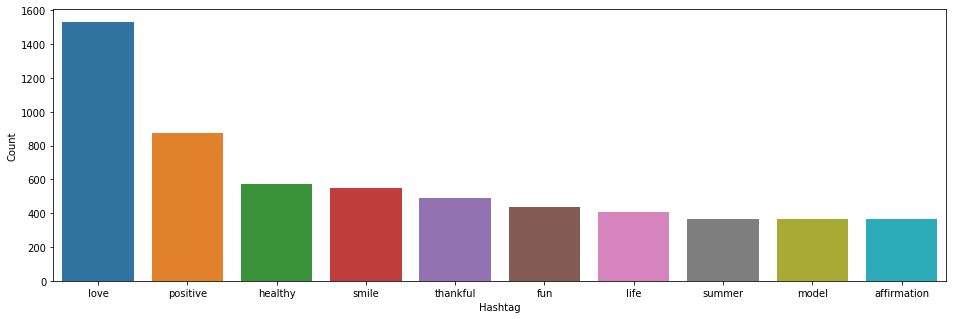

In [ ]:
#For the positive tweets
import seaborn as sns

a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
#Selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

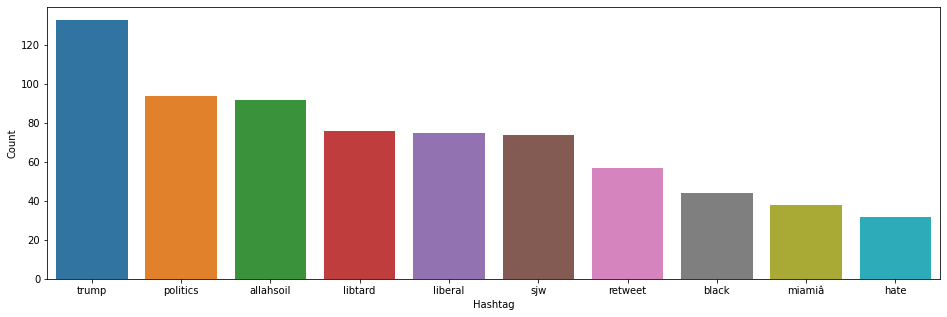

In [ ]:
#For the negative tweets

b = nltk.FreqDist(ht_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#Some Cleaning of the Texts

In [ ]:
#Removing special characters,Punctuations, numbers,stemming etc

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,  31962):
  review = re.sub('[^a-zA-Z]', ' ', train_tweet_df['cleaned_tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

['father dysfunct selfish drag kid dysfunct run', 'thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 'bihday majesti', 'model love u take u time ur', 'factsguid societi motiv', 'huge fan fare big talk leav chao pay disput get allshowandnogo', 'camp tomorrow danni', 'next school year year exam think school exam hate imagin actorslif revolutionschool girl', 'love land allin cav champion cleveland clevelandcavali', 'welcom gr', 'ireland consum price index mom climb previou may blog silver gold forex', 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love', 'get see daddi today day gettingf', 'cnn call michigan middl school build wall chant tcot', 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin', 'ouch junior angri got junior yugyoem omg', 'thank paner thank posit', 'retweet agre', 'friday smile around via ig user cooki make peopl', 'know essenti oil not made chemic', 'euro peopl blame ha

#Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = train_tweet_df['label']

#OR this way too(It depends)

#from sklearn.feature_extraction.text import CountVectorizer
#bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
#bow = bow_vectorizer.fit_transform(corpus).toarray()


In [ ]:
len(X[0])

1500

#Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix And KPIs

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5774  211]
 [ 185  223]]


0.9380572501173158

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5985
           1       0.51      0.55      0.53       408

    accuracy                           0.94      6393
   macro avg       0.74      0.76      0.75      6393
weighted avg       0.94      0.94      0.94      6393



In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.5296912114014253

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.5465686274509803

#Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = train_tweet_df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5913   72]
 [ 227  181]]


0.9532300954168622

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5985
           1       0.72      0.44      0.55       408

    accuracy                           0.95      6393
   macro avg       0.84      0.72      0.76      6393
weighted avg       0.95      0.95      0.95      6393



In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.5476550680786686

#Training the Support Vector Machine(SVM) model on the Training set

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = train_tweet_df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier= SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5924   61]
 [ 226  182]]


0.9551071484436102

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5985
           1       0.75      0.45      0.56       408

    accuracy                           0.96      6393
   macro avg       0.86      0.72      0.77      6393
weighted avg       0.95      0.96      0.95      6393



In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.5591397849462365

#Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = train_tweet_df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5823  162]
 [ 175  233]]


0.9472860941654935

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5985
           1       0.59      0.57      0.58       408

    accuracy                           0.95      6393
   macro avg       0.78      0.77      0.78      6393
weighted avg       0.95      0.95      0.95      6393



In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.5803237858032378